# Gas Discharge & Stellar Feedback-driven Outflows (Part 1 /3):
## Kinematic and Other Observations
`-- Leo Lonzarich, 20 October 2021 // [Updated 15-12-21] --`


### Table of Contents
- [Analysing Discharged Gas](#compare)
    - [Comparing Radial Positions](#radialpositions)
    - [Comparing Radial Velocities](#velocities)
    - [Comparing Exit Angles](#ejectedexit)
    - [Comparing Temperatures](#comptemperature)
- [The Proving Grounds](#proving)


### General Comments on Data/Contents of this Noteboook
- Repeat occurance of particle ids (`pids`) in data sets below typically a result of particle being discharged/accreted more than once. (Checking timesteps of repeated pid should verify this.)


- The datasets: (each logs the properties (stored in `keys`) for their respective particles for the specified point relative to their differentiating event.)

    1. **Ejected/Expelled Data (from H. Akins):**
        - *Ejected*: Gas particles that have been removed from their respective satellite galaxy's disk to the halo. (Properties for **timestep after ejection**.)
        - *Expelled*: Gas particles (within the disk or halo of their respective satellite galaxy) that have been removed beyond the virial radius of their satellite; that is, all gas particles removed to the field. (Again, properties given for **timestep after expullsion**.)
        <br><br>
    2. **Discharge Data (From L. Lonzarich):**
        - *Discharged*: Gas particles that have been removed from the disk of their respective satellite galaxy. This includes both gas moved to halo, and that moved beyond the virial radius. (Properties given for **timestep after discharge event**.)
        - *Predischarged*: A collection of the same particles in *Discharged*, but instead giving the properties of each particle prior to their discharge event (thereby allowing pre- and post-discharge comparisons).
        - *Heated*: Gas particles in *Discharged* that experienced supernova(e) heating (functionally, their 'cooling' was turned off) in the timestep prior to being discharged. (Note: this dataset can be also be obtained by selecting particles from *Discharged* with `sneHeated==True`.)
        - *Preheated*: Similar to *Predischarged*; Consists of the same particles in *Heated*, but with properties of each particle for the timestep prior to discharge.
        <br><br>
        - *Accreted*: Gas particles in the halo or beyond the virial radius of a satellite that are accreted onto the satellite's disk. (Properties given for **timestep following accretion event**.) Note that this includes particles that were previously discharged from the satellite's disk, and those that were not. 
        - *Reaccreted*: A subset of *Accreted*; Gas particles in the halo or beyond the virial radius of a satellite as a result of a prior discharge event that are reaccreted onto the satellite's disk. (Properties given for **timestep following reaccretion event**.)


    
    
- Noteworthy measures and their units (unless where otherwise noted):
    - *Time* is in Gigayears $(Gyrs)$.
    - *Distances* in kiloparsecs $(kpc)$.
    - *Velocities* in kilometers per second $(km \ s^{-1})$.
    - *Masses* in solar masses $(M_{sol})$.
    - *Gravitational Constant* G in ($kpc\ km^2\ M_{sol}^{-1}\ s^{-2})$

In [1]:
import numpy as np
import pylab
import pynbody
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

from analysis import * 
from compiler import *

In [2]:
# check to ensure latex works in string labels.
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [3]:
# rootPath is specified in `base.py` and can be further modified as needed to match directories. 
path = f'{rootPath}Stellar_Feedback_Code/SNeData/discharged_particles.hdf5'
with pd.HDFStore(path) as hdf:
    keys = np.array([h[1:] for h in hdf.keys()])

# listing dwarf galaxies of simulations that are viable for study (gaseous, satellite, etc).
print(len(keys), f'Available Keys:\n', *keys)

19 Available Keys:
 h148_13 h148_278 h148_28 h148_283 h148_329 h148_37 h148_45 h148_68 h148_80 h229_20 h229_22 h229_23 h229_27 h229_55 h242_24 h242_41 h242_80 h329_137 h329_33


## The 'Discharged' Gas: Comparing Heated Vs. All <a class="anchor" id="compare"></a>

____
____

We are here concerned only with particles that leave the disk of a satellite galaxy; whether they are removed to the satellite halo or beyond matters not. To avoid confusion with the terminology used in other areas of this research, we coin the following terms which will also correspond to pre-calculated datasets:

- *Discharged*: Gas particles that have been removed from the disk of their respective satellite galaxy. This includes both gas moved to halo, and that moved beyond the virial radius. (Properties given for **timestep after discharge event**.)
- *Predischarged*: A collection of the same particles in *Discharged*, but instead giving the properties of each particle prior to their discharge event (thereby allowing pre- and post-discharge comparisons).
- *Heated*: Gas particles in *Discharged* that experienced supernova(e) heating (functionally, their 'cooling' was turned off) in the timestep prior to being discharged. (Note: this dataset can be also be obtained by selecting particles from *Discharged* with `sneHeated==True`.)
- *Preheated*: Similar to *Predischarged*; Consists of the same particles in *Heated*, but with properties of each particle for the timestep prior to discharge.
<br><br>
- *Accreted*: Gas particles in the halo or beyond the virial radius of a satellite that are accreted onto the satellite's disk. (Properties given for **timestep following accretion event**.) Note that this includes particles that were previously discharged from the satellite's disk, and those that were not. 
- *Reaccreted*: A subset of *Accreted*; Gas particles in the halo or beyond the virial radius of a satellite as a result of a prior discharge event that are reaccreted onto the satellite's disk. (Properties given for **timestep following reaccretion event**.)

Unless otherwise noted, 'ejection' and 'expulsion' will be used for their denotative meaning. Finally, define

$$
M_{dsrg}
$$

to be the collective mass of all discharged particles --- functionally, the sum of the masses of every gas particle in the *discharged* dataset. Similarly, let

$$
M_{sne}
$$

be the total mass of all SNe-heated, discharged particles in the *heated* dataset. We will use this to both normalize our data, and determine what fractions of reaccreted particles (in terms of mass) adhere to particular critera.

### General Properties of Sims and Selected Satellites

In [4]:
predischarged, discharged, preheated, heated = read_all_discharged()
all_accreted, reaccreted = read_accreted() # we are generally only concerned w/ `reaccreted` in these treatements.

> Returning (predischarged, discharged, adv. accreted, preheated, heated) for all satellites <
> Returning (all_accreted, reaccreted) for all satellites <


In [44]:
# finding number of particles per simulation; Sandra (h148), Ruth (h229), Sonia (h242), Elena (h329)

keys = ['h148_13','h148_28','h148_37','h148_45','h148_68','h148_80','h148_283',
        'h148_278','h148_329','h229_20','h229_22','h229_23','h229_27','h229_55',
        'h242_24','h242_41','h242_80','h329_33','h329_137']

dis_h148 = pd.DataFrame([])
dis_h229 = pd.DataFrame()
dis_h242 = pd.DataFrame()
dis_h329 = pd.DataFrame()

for key in keys:
    sim = str(key[0:4])
    
    if sim=='h148':
        dis_h148 = dis_h148.append(discharged[discharged.key==key])
        continue
    elif sim=='h229':
        dis_h229 = dis_h229.append(discharged[discharged.key==key])
        continue
    elif sim=='h242':
        dis_h242 = dis_h242.append(discharged[discharged.key==key])
        continue
    elif sim=='h329':
        dis_h329 = dis_h329.append(discharged[discharged.key==key])
        continue
    else: 
        print('err')

In [47]:
# len(dis_h148)+len(dis_h229)+len(dis_h242)+len(dis_h329), len(discharged)

len(dis_h148), len(dis_h229), len(dis_h242), len(dis_h329)

(136009, 67852, 36046, 4249)

In [29]:
# finding min/max masses of satellites.

print('Min Mvir: ', discharged.sat_Mvir.min()*10**-8, '\n Max Mvir: ', discharged.sat_Mvir.max()*10**-10)


discharged.keys()

Min Mvir:  1.4752306342014143 
 Max Mvir:  1.7000034128338615


Index(['time', 'pid', 'rho', 'temp', 'mass', 'coolontime', 'r', 'r_per_Rvir',
       'x', 'y', 'z', 'satRvir', 'a', 'vx', 'vy', 'vz', 'v', 'r_rel_host',
       'r_rel_host_per_Rvir', 'x_rel_host', 'y_rel_host', 'z_rel_host',
       'hostRvir', 'vx_rel_host', 'vy_rel_host', 'vz_rel_host', 'v_rel_host',
       'sat_Xc', 'sat_Yc', 'sat_Zc', 'sat_vx', 'sat_vy', 'sat_vz', 'host_Xc',
       'host_Yc', 'host_Zc', 'host_vx', 'host_vy', 'host_vz', 'sat_Mstar',
       'sat_Mgas', 'host_Mstar', 'host_Mgas', 'sat_r_half', 'sat_r_gas',
       'host_r_half', 'host_r_gas', 'in_sat', 'in_host', 'in_other_sat',
       'in_IGM', 'dt', 'r_gal', 'host_r_gal', 'sat_disk', 'sat_halo',
       'host_disk', 'host_halo', 'other_sat', 'IGM', 'sat_Mvir', 'angle',
       'sneHeated', 'key'],
      dtype='object')

### Comparing Radial Positions <a class="anchor" id="radialpositions"></a>

For this treatment, we look specifically at radial positions for 1) gas that has been 'discharged' from select satellite galaxy's disks, 2) the subset of 'discharged gas that was SNe-heated (abreviated by 'heated'), and 3) 'pre-discharged' gas --- that is, the 'discharged' gas in the timestep before it is ejected.

In [ ]:
predischarged, discharged, preheated, heated = read_all_discharged()
all_accreted, reaccreted = read_accreted() # we are generally only concerned w/ `reaccreted` in these treatements.

In [5]:
# pulling subset of discharged gas that did not experience SNe heating prior to discharge.
cooled = discharged[discharged.sneHeated==False]

In [6]:
# creating weight attributes for plotting.
predischarged['weight'] = predischarged['mass'] / predischarged['mass'].sum()
discharged['weight'] = discharged['mass'] / discharged['mass'].sum()
cooled['weight'] = cooled['mass']/cooled['mass'].sum() #discharged['mass'].sum() #cooled['mass'].sum()
reaccreted['weight'] = reaccreted['mass'] / reaccreted['mass'].sum()

preheated['weight'] = preheated['mass'] / preheated['mass'].sum()
heated['weight'] = heated['mass'] / heated['mass'].sum() #discharged['mass'].sum() #heated['mass'].sum()

In [12]:
# consolidating cartesian position & velocity components for every gas particle relative to its respective satellite.
predischarged_pos = np.array([predischarged.x, predischarged.y, predischarged.z]).T
predischarged_vel = np.array([predischarged.vx, predischarged.vy, predischarged.vz]).T

# for gas that was SNe-heated.
preheated_pos = np.array([preheated.x, preheated.y, preheated.z]).T
preheated_vel = np.array([preheated.vx, preheated.vy, preheated.vz]).T

# for gas after being discharged from its satellite.
discharged_pos = np.array([discharged.x, discharged.y, discharged.z]).T
discharged_vel = np.array([discharged.vx, discharged.vy, discharged.vz]).T

# repeating the above for SNe-heated, discharged gas.
heated_pos = np.array([heated.x, heated.y, heated.z]).T
heated_vel = np.array([heated.vx, heated.vy, heated.vz]).T

# for discharged gas after being accreted back onto its satellite.
reaccreted_pos = np.array([reaccreted.x, reaccreted.y, reaccreted.z]).T
reaccreted_vel = np.array([reaccreted.vx, reaccreted.vy, reaccreted.vz]).T


# calculating radial positions of hot/all discharged gas.
pre_radpos = np.sqrt(np.sum(predischarged_pos**2, axis=1))
preheated_radpos = np.sqrt(np.sum(preheated_pos**2, axis=1))
all_radpos = np.sqrt(np.sum(discharged_pos**2, axis=1))
heated_radpos = np.sqrt(np.sum(heated_pos**2, axis=1))
reaccreted_radpos = np.sqrt(np.sum(reaccreted_pos**2, axis=1))

# computing radial velocities for hot/all discharged gas particles.
pre_radvel = np.sum(predischarged_pos * predischarged_vel, axis=1) / np.sqrt(np.sum(predischarged_pos**2, axis=1))
preheated_radvel = np.sum(preheated_pos * preheated_vel, axis=1) / np.sqrt(np.sum(preheated_pos**2, axis=1))
all_radvel = np.sum(discharged_pos * discharged_vel, axis=1) / np.sqrt(np.sum(discharged_pos**2, axis=1))
heated_radvel = np.sum(heated_pos * heated_vel, axis=1) / np.sqrt(np.sum(heated_pos**2, axis=1))
accreted_radvel = np.sum(reaccreted_pos * reaccreted_vel, axis=1) / np.sqrt(np.sum(reaccreted_pos**2, axis=1))

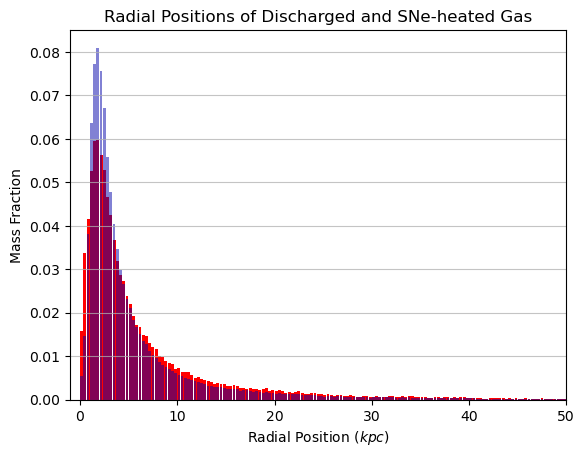

In [72]:
# Position histograms for all gas, and heated gas.
bins = 150

plt.figure()
plt.hist(all_radpos, bins=bins, weights=discharged.weight, color='#0504aa', alpha=0.5, rwidth=0.85,\
         label='Discharged', zorder=-1, range=(0, 50))

plt.hist(heated_radpos, bins=bins, weights=heated.weight, color='red', alpha=1, rwidth=0.90,\
         label='Discharged w/SNe Heating', zorder=-1000, range=(0, 50))


plt.grid(axis='y', alpha=0.75)
plt.xlabel('Radial Position $(kpc)$')
plt.ylabel('Mass Fraction')
plt.title('Radial Positions of Discharged and SNe-heated Gas')

# leg1 = plt.legend(title='Gas', loc='upper left')
# leg1._legend_box.align = 'right'
# legend(loc=(0.26,0.74))

plt.xlim(-1,50)
plt.ylim(0,0.085)

plt.locator_params(axis="x", nbins=10)
plt.locator_params(axis="y", nbins=10)



plt.show()

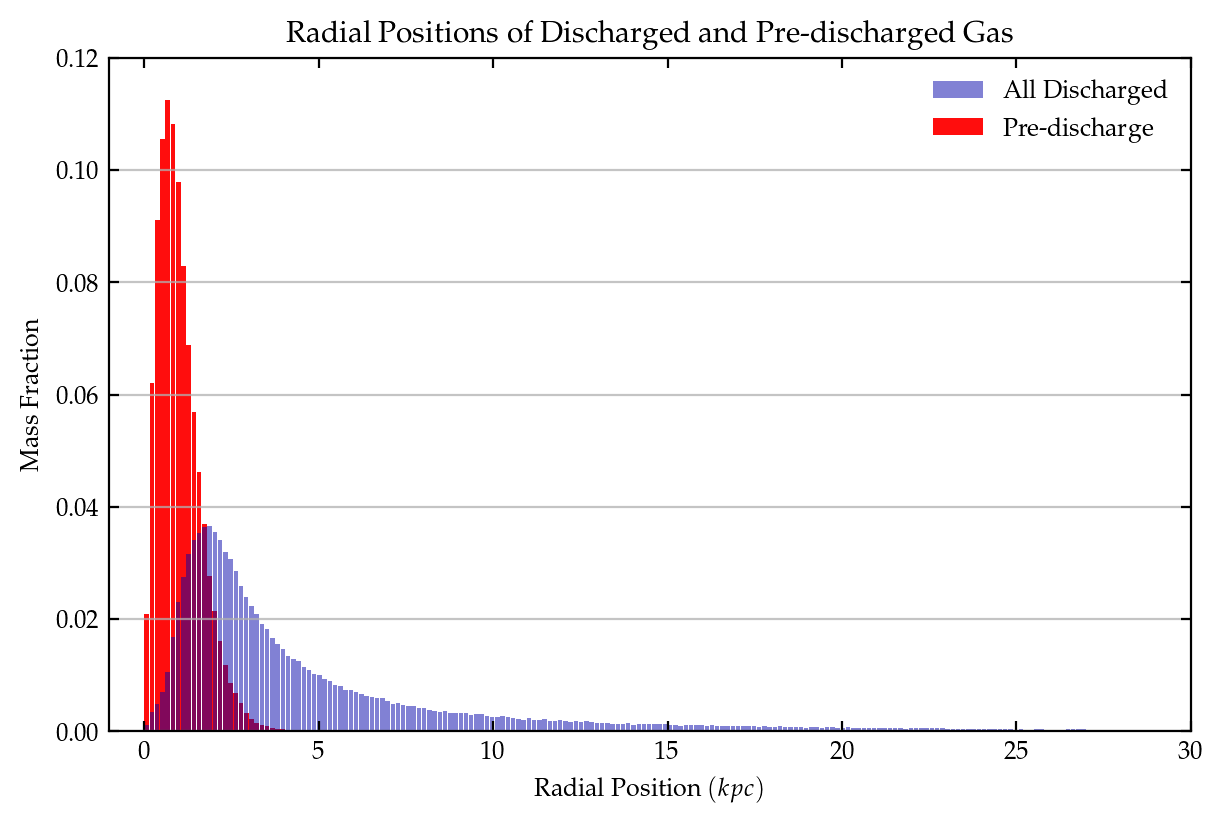

In [45]:
# Position  histograms for all gas, and heated gas.
bins = 200

plt.figure()
plt.hist(all_radpos, bins=bins, weights=discharged.weight, color='#0504aa', alpha=0.5, rwidth=0.85,\
         label='All Discharged', zorder=-1, range=(0, 30))
plt.hist(pre_radpos, bins=bins, weights=predischarged.weight, color='red', alpha=0.95, rwidth=0.9,\
         label='Pre-discharge', zorder=-1000, range=(0, 30))


plt.grid(axis='y', alpha=0.75)
plt.xlabel('Radial Position $(kpc)$')
plt.ylabel('Mass Fraction')
plt.title('Radial Positions of Discharged and Pre-discharged Gas')

plt.xlim(-1,30)
plt.ylim(0,0.12)

plt.locator_params(axis="x", nbins=10)
plt.locator_params(axis="y", nbins=10)

plt.legend(loc='upper right')
plt.show()

We plot the histograms as cleaner line plots below to better-observe the trends in positions for the different sets of data.

Further, in these plots, we also include a horizontal dashed line representing the radial position of the 'radial center of mass,' or 'COM,' for each data set.

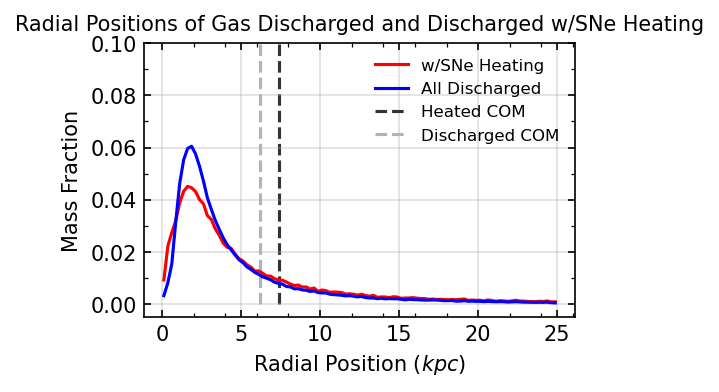

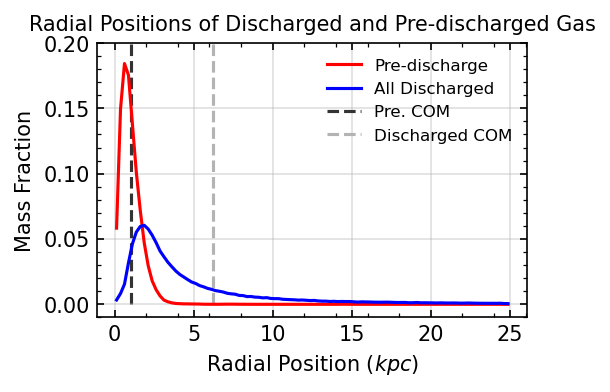

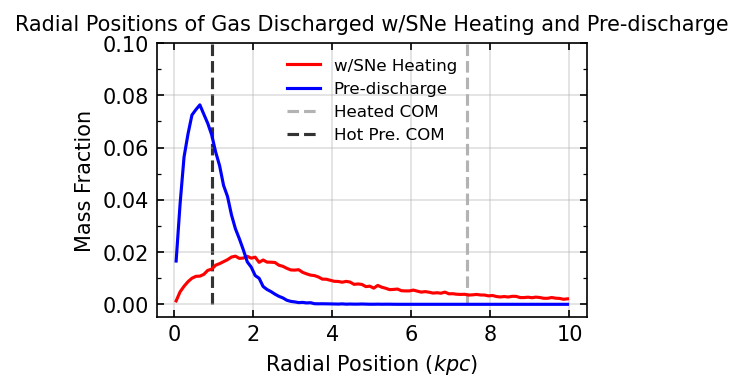

In [71]:
##### plotting discharged vs. heated gas #####
bins = 100
fig, ax = plt.subplots(1,1,dpi=150, figsize=(3.5,2.5), constrained_layout=True) # change to dpi=300 for printout.


# applying conditional on distances of gas from center of satellite; collecting frequency and bin information for plot.
y1, x = np.histogram(heated_radpos, bins=bins, weights=heated.weight, range=(0, 25))
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='w/SNe Heating', c='r')

y1, x = np.histogram(all_radpos, bins=bins, weights=discharged.weight, range=(0, 25))
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='All Discharged', c='b')

com1 = heated_radpos.mean()
com2 = all_radpos.mean()
ax.plot([com1,com1],[0,0.3],linestyle='--',color='0.2',zorder=-1, label='Heated COM')
ax.plot([com2,com2],[0,0.3],linestyle='--',color='0.7',zorder=-1, label='Discharged COM')


# labels, axis scaling, etc.
ax.legend(frameon=False, fontsize='8')

ax.set_title('Radial Positions of Gas Discharged and Discharged w/SNe Heating', fontsize='medium')
ax.set_xlabel(r'Radial Position $(kpc)$')
ax.set_ylabel('Mass Fraction')
# ax.set_xlim(0,30)
ax.set_ylim(-0.005,0.1)

ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(2))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))

# ticks = ticker.FuncFormatter(lambda y, pos: '{0:g}'.format(y*1))
# ax.yaxis.set_major_formatter(ticks)

ax.ticklabel_format(axis="y", style="plain",scilimits=(0,0))
ax.tick_params(direction='in',which='both',right=True,top=True)
ax.grid(alpha=0.4, zorder=-1000)

# plt.savefig('plots/theta_allsats_stacked.pdf')




##### plotting discharged vs. pre-discharged gas #####
fig, ax = plt.subplots(1,1,dpi=150, figsize=(3.5,2.5), constrained_layout=True) # change to dpi=300 for printout.


# applying conditional on distances of gas from center of satellite; collecting frequency and bin information for plot.
y1, x = np.histogram(pre_radpos, bins=bins, weights=predischarged.weight, range=(0, 25))
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='Pre-discharge', c='r')

y1, x = np.histogram(all_radpos, bins=bins, weights=discharged.weight, range=(0, 25))
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='All Discharged', c='b')

com1 = pre_radpos.mean()
com2 = all_radpos.mean()
ax.plot([com1,com1],[0,0.3],linestyle='--',color='0.2',zorder=-1, label='Pre. COM')
ax.plot([com2,com2],[0,0.3],linestyle='--',color='0.7',zorder=-1, label='Discharged COM')


# labels, axis scaling, etc.
ax.legend(frameon=False, fontsize='8')

ax.set_title('Radial Positions of Discharged and Pre-discharged Gas', fontsize='medium')
ax.set_xlabel(r'Radial Position $(kpc)$')
ax.set_ylabel('Mass Fraction')
# ax.set_xlim(0,30)
ax.set_ylim(-0.01,0.2)

ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(2))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))

ax.ticklabel_format(axis="y", style="plain",scilimits=(0,0))
ax.tick_params(direction='in',which='both',right=True,top=True)
ax.grid(alpha=0.4, zorder=-1000)

# plt.savefig('plots/theta_allsats_stacked.pdf')




##### plotting pre-discharge heated vs. heated gas #####
fig, ax = plt.subplots(1,1,dpi=150, figsize=(3.5,2.5), constrained_layout=True) # change to dpi=300 for printout.


# applying conditional on distances of gas from center of satellite; collecting frequency and bin information for plot.
y1, x = np.histogram(heated_radpos, bins=bins, weights=heated.weight, range=(0, 10))
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='w/SNe Heating', c='r')

y1, x = np.histogram(preheated_radpos, bins=bins, weights=preheated.weight, range=(0, 10))
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='Pre-discharge', c='b')


# plot mean position of mass.
com1 = heated_radpos.mean()
com2 = preheated_radpos.mean()
ax.plot([com1,com1],[0,0.3],linestyle='--',color='0.7',zorder=-1, label='Heated COM')
ax.plot([com2,com2],[0,0.3],linestyle='--',color='0.2',zorder=-1, label='Hot Pre. COM')


# labels, axis scaling, etc.
ax.legend(frameon=False, fontsize='8')

ax.set_title('Radial Positions of Gas Discharged w/SNe Heating and Pre-discharge', fontsize='medium')
ax.set_xlabel(r'Radial Position $(kpc)$')
ax.set_ylabel('Mass Fraction')
# ax.set_xlim(0,10)
ax.set_ylim(-0.005,0.1)

ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(2))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))

ax.ticklabel_format(axis="y", style="plain",scilimits=(0,0))
ax.tick_params(direction='in',which='both',right=True,top=True)
ax.grid(alpha=0.4, zorder=-1000)

# plt.savefig('plots/theta_allsats_stacked.pdf')
plt.show()

In [10]:
# finding mean positions of mass.
pre_com = pre_radpos.mean()
hot_pre_com = hot_pre_radpos.mean()
all_com = all_radpos.mean()
hot_com = hot_radpos.mean()

# computing difference in COMs for the above three graphs in order.
print(all_com-hot_com), print(all_com-pre_com), print(hot_com-hot_pre_com);

-1.2044551539314234
5.193728213349389
6.393020256511232


In these above three plots, it is easy to mistake the that the distributions of the different gas selections are nearly identical since all appear to peak near 0 kpc. However, when we also plot indicators locating the averaged radial position (which is here termed the 'radial center of mass' or COM because we analyse a percentage distribution of mass), it becomes clear that there are noteworthy differences in how far each chosen set of gas is from the satellite centers.

In the cases above, it turns out that the radial centers of mass differ as follows:

- The total of discharged gas is ejected $\sim 11.34 \ kpc$ farther than SNe-discharged gas on its own;

- The total of discharged gas is ejected $\sim 14.07 \ kpc$ out from its original location in the satellite disks;

- The SNe-discharged gas moves $\sim 3.06 \ kpc$ out from its original position in the satellite disks (which is not far --- likely just beyond the edge of the disk into the halo).



### Comparing Radial Velocities <a class="anchor" id="velocities"></a>

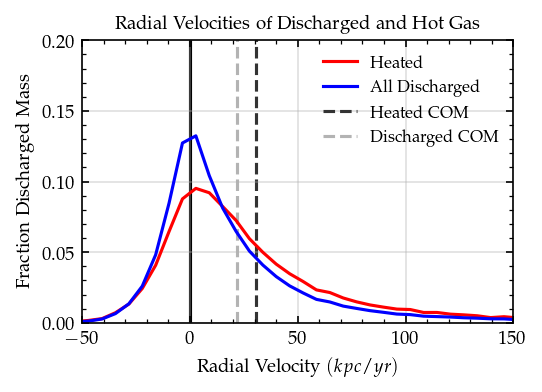

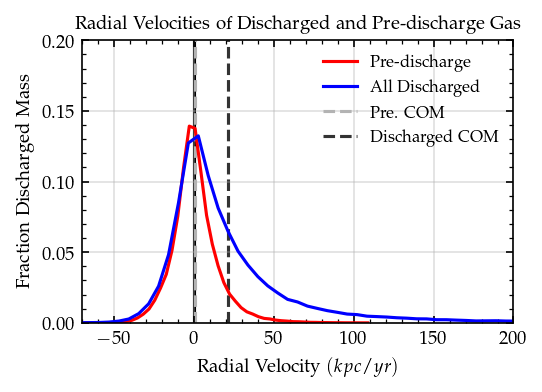

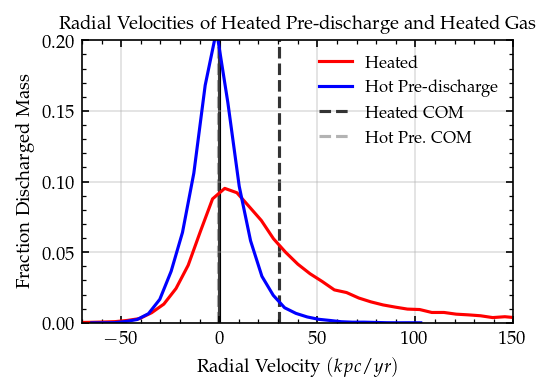

In [17]:
##### plotting discharged vs. heated gas #####
bins = 100
fig, ax = plt.subplots(1,1,dpi=150, figsize=(3.5,2.5), constrained_layout=True) # change to dpi=300 for printout.


# applying conditional on distances of gas from center of satellite; collecting frequency and bin information for plot.
y1, x = np.histogram(hot_radvel, bins=bins, weights=heated.weight)
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='Heated', c='r')

y1, x = np.histogram(all_radvel, bins=bins, weights=discharged.weight)
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='All Discharged', c='b')


# plot mean position of mass.
com1 = hot_radvel.mean()
com2 = all_radvel.mean()
ax.plot([com1,com1],[0,0.3],linestyle='--',color='0.2',zorder=-1, label='Heated COM')
ax.plot([com2,com2],[0,0.3],linestyle='--',color='0.7',zorder=-1, label='Discharged COM')

# plot horizontal line for zero velocity.
plotrange = [0,0.33]
ax.plot([0,0],[0,0.3],linestyle='solid',color='black',zorder=-1)


# labels, axis scaling, etc.
ax.legend(frameon=False, fontsize='8')

ax.set_title('Radial Velocities of Discharged and Hot Gas', fontsize='medium')
ax.set_xlabel(r'Radial Velocity $(kpc/yr)$')
ax.set_ylabel('Fraction Discharged Mass')
ax.set_xlim(-50,150)
ax.set_ylim(0,0.2)

ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(10))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))

ax.ticklabel_format(axis="y", style="plain",scilimits=(0,0))
ax.tick_params(direction='in',which='both',right=True,top=True)
ax.grid(alpha=0.4, zorder=-1000)

# plt.savefig('plots/theta_allsats_stacked.pdf')




##### plotting discharged vs. pre-discharged gas #####
fig, ax = plt.subplots(1,1,dpi=150, figsize=(3.5,2.5), constrained_layout=True) # change to dpi=300 for printout.


# applying conditional on distances of gas from center of satellite; collecting frequency and bin information for plot.
y1, x = np.histogram(pre_radvel, bins=50, weights=predischarged.weight)
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='Pre-discharge', c='r')

y1, x = np.histogram(all_radvel, bins=100, weights=discharged.weight)
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='All Discharged', c='b')


# plot mean position of mass.
com1 = pre_radvel.mean()
com2 = all_radvel.mean()
ax.plot([com1,com1],[0,0.3],linestyle='--',color='0.7',zorder=-1, label='Pre. COM')
ax.plot([com2,com2],[0,0.3],linestyle='--',color='0.2',zorder=-1, label='Discharged COM')

# plot horizontal line for zero velocity.
plotrange = [0,0.33]
ax.plot([0,0],[0,0.3],linestyle='solid',color='black',zorder=-10000)

# labels, axis scaling, etc.
ax.legend(frameon=False, fontsize='8')

ax.set_title('Radial Velocities of Discharged and Pre-discharge Gas', fontsize='medium')
ax.set_xlabel(r'Radial Velocity $(kpc/yr)$')
ax.set_ylabel('Fraction Discharged Mass')
ax.set_xlim(-70,200)
ax.set_ylim(0,0.2)

ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(10))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))

ax.ticklabel_format(axis="y", style="plain",scilimits=(0,0))
ax.tick_params(direction='in',which='both',right=True,top=True)
ax.grid(alpha=0.4, zorder=-1000)

# plt.savefig('plots/theta_allsats_stacked.pdf')




##### plotting pre-discharge heated vs. heated gas #####
bins = 100
fig, ax = plt.subplots(1,1,dpi=150, figsize=(3.5,2.5), constrained_layout=True) # change to dpi=300 for printout.


# applying conditional on distances of gas from center of satellite; collecting frequency and bin information for plot.
y1, x = np.histogram(hot_radvel, bins=100, weights=heated.weight)
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='Heated', c='r')

y1, x = np.histogram(hot_pre_radvel, bins=30, weights=hot_predischarged.weight)
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='Hot Pre-discharge', c='b')


# plot mean position of mass.
com1 = hot_radvel.mean()
com2 = hot_pre_radvel.mean()
ax.plot([com1,com1],[0,0.3],linestyle='--',color='0.2',zorder=-1, label='Heated COM')
ax.plot([com2,com2],[0,0.3],linestyle='--',color='0.7',zorder=-1, label='Hot Pre. COM')

# plot horizontal line for zero velocity.
plotrange = [0,0.33]
ax.plot([0,0],[0,0.3],linestyle='solid',color='black',zorder=-1)


# labels, axis scaling, etc.
ax.legend(frameon=False, fontsize='8')

ax.set_title('Radial Velocities of Heated Pre-discharge and Heated Gas', fontsize='medium')
ax.set_xlabel(r'Radial Velocity $(kpc/yr)$')
ax.set_ylabel('Fraction Discharged Mass')
ax.set_xlim(-70,150)
ax.set_ylim(0,0.2)

ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(10))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))

ax.ticklabel_format(axis="y", style="plain",scilimits=(0,0))
ax.tick_params(direction='in',which='both',right=True,top=True)
ax.grid(alpha=0.4, zorder=-1000)

# plt.savefig('plots/theta_allsats_stacked.pdf')
plt.show()

The radial centers of mass are again included to better detail the velocity at which the bulk of each gas group is traveling.

All particles are moving out/into the the center of the satellites nearly uniformly, with slight bias towards exiting, as we should expect.

The second plot is particcularly telling of the validity in data collection --- that is, the bulk of gas, before being discharged, has a radial velocity of 0 $km/s$ relative to the center of the satellite galaxies.

### Comparing Exit Angles <a class="anchor" id="ejectedexit"></a>


In [7]:
#ejected, cooled, expelled, accreted = read_all_ejected_expelled()
predischarged, discharged, accreted, preheated, heated = read_discharged()

h148_13 h148_278 h148_28 h148_283 h148_329 h148_37 h148_45 h148_68 h148_80 h229_20 h229_22 h229_23 h229_27 h229_55 h242_24 h242_41 h242_80 h329_137 h329_33
> Returning (predischarged, discharged, accreted, preheated, heated) for all available satellites <


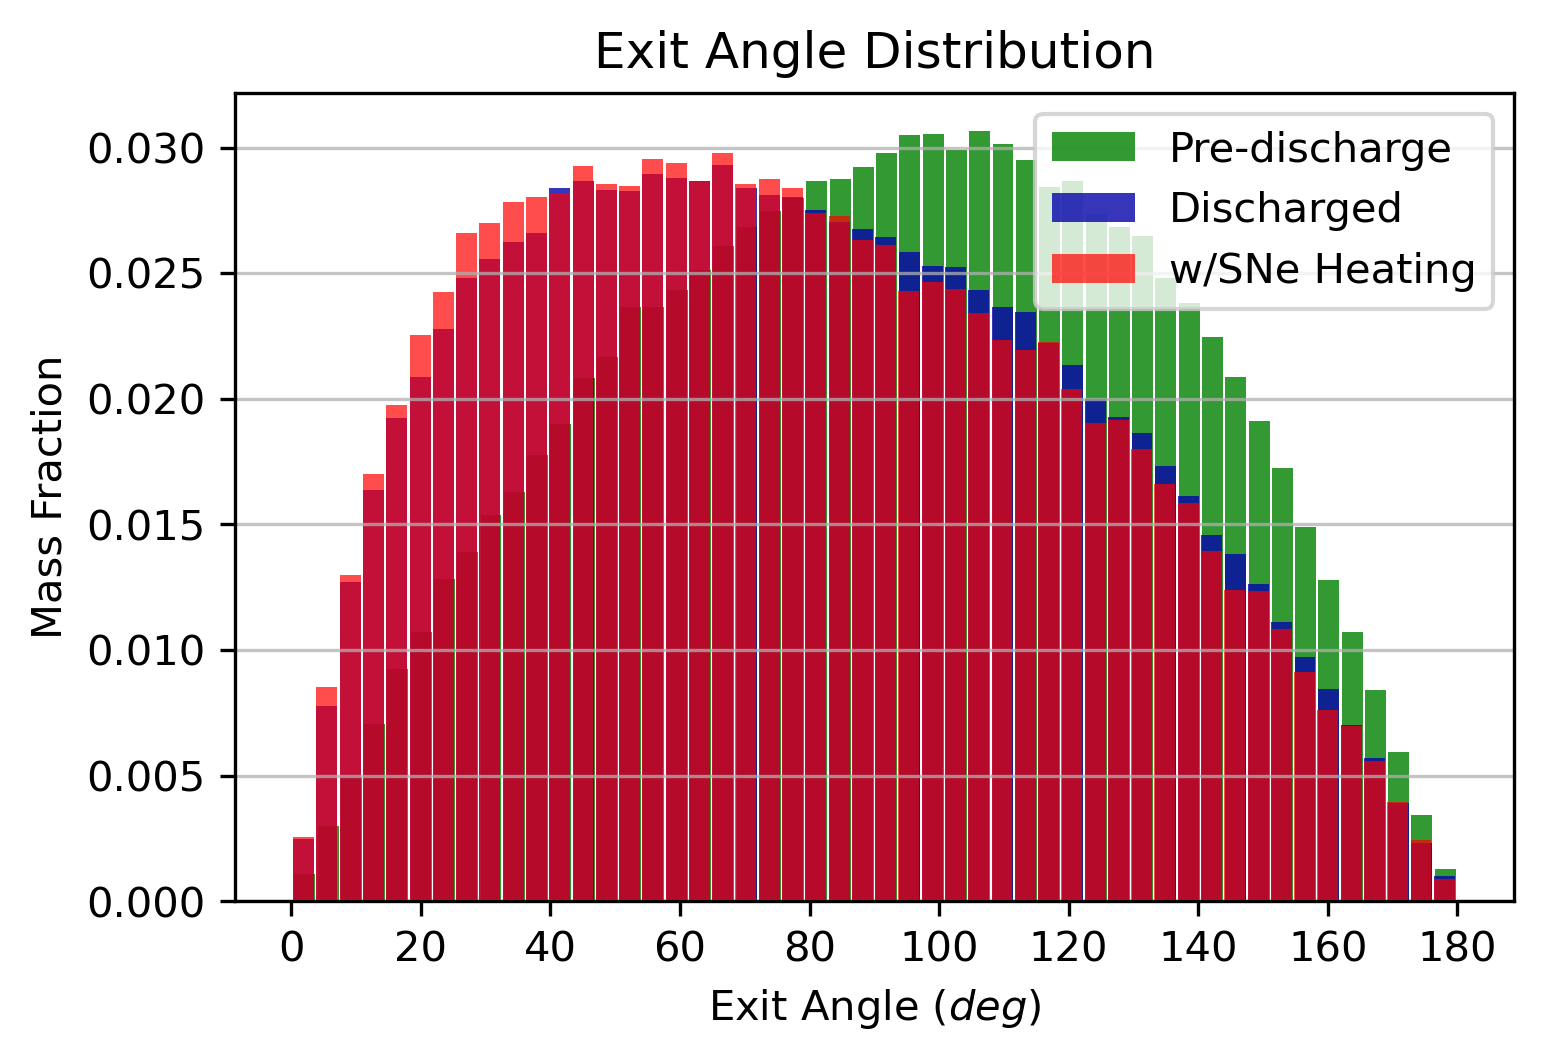

In [17]:
# pulling exit angles.
pre_angle = predischarged.angle
all_angle = discharged.angle
hot_angle = heated.angle

# exit angle histograms for pre-discharged, and discharged, SNe-heated gas.
plt.figure(dpi=300, figsize=(5.5,3.5))
plt.hist(pre_angle, bins=50, weights=predischarged.weight, color='green', alpha=0.8, rwidth=0.9, label='Pre-discharge')
plt.hist(all_angle, bins=50, weights=discharged.weight, color='#0504aa', alpha=0.8, rwidth=0.9, label='Discharged')
plt.hist(hot_angle, bins=50, weights=heated.weight, color='red', alpha=0.7, rwidth=.9, label='w/SNe Heating')


plt.grid(axis='y', alpha=0.75)
plt.xlabel('Exit Angle ($deg$)')
plt.ylabel('Mass Fraction')
plt.title('Exit Angle Distribution')

# leg1 = plt.legend(title='Gas', loc='upper left')
# leg1._legend_box.align = 'right'
# legend(loc=(0.26,0.74))

#plt.xlim(0,16)
#plt.ylim(0,0.085)

plt.locator_params(axis="x", nbins=10)
plt.locator_params(axis="y", nbins=10)


plt.legend(loc='upper right')
plt.show()

In [8]:
# constructing bins for exit angle histograms.
N = 30
theta1,theta2 = 0,0 # initialize
bins = np.array([theta1]) 
while theta2 < 3.14:
    theta2 = np.arccos(np.cos(theta1)-(2/N))
    bins = np.append(bins,theta2)
    theta1 = theta2

bins = bins*180/np.pi
bincenters = 0.5*(bins[1:]+bins[:-1])

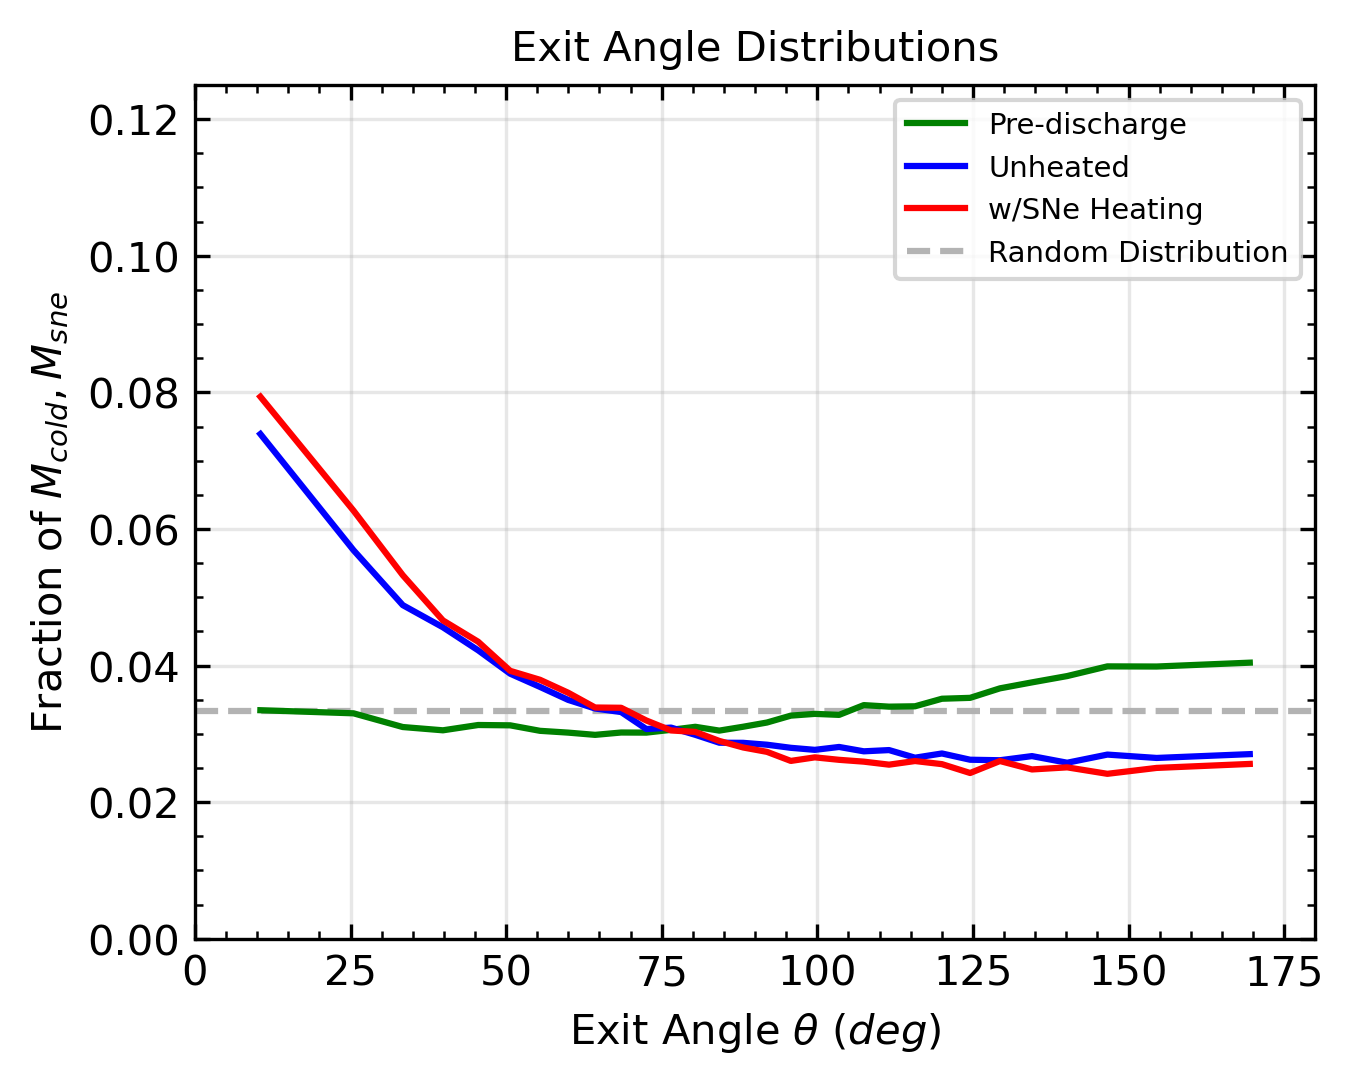

In [10]:
# plotting.
fig, ax = plt.subplots(1,1,dpi=300, figsize=(4.5,3.5), constrained_layout=True) # change to dpi=300 for printout.

# applying conditional on distances of gas from center of satellite; collecting frequency and bin information for plot.
y1, bins = np.histogram(predischarged.angle, bins=bins, weights=predischarged.weight)
ax.plot(bincenters, y1, label='Pre-discharge', c='green')

y2, bins = np.histogram(cooled.angle, bins=bins, weights=cooled.weight)
ax.plot(bincenters, y2, label='Unheated', c='b')

y3, bins = np.histogram(heated.angle, bins=bins, weights=heated.weight)
ax.plot(bincenters, y3, label='w/SNe Heating', c='r')



# line representing random distribution.
percent = 1/N
ax.plot([0,180],[percent,percent],linestyle='--',color='0.7',zorder=-1, label='Random Distribution')


# labels, axis scaling, etc.
ax.set_title('Exit Angle Distributions', fontsize='medium')
ax.set_xlabel(r'Exit Angle $\theta$ ($deg$)')
ax.set_ylabel('Fraction of $M_{cold},M_{sne}$')
ax.set_xlim(0,180)
ax.set_ylim(0,0.125)

ax.legend(frameon=True, fontsize='7')

ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(5))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.005))
#ax.ticklabel_format(axis="y", style="sci",scilimits=(0,0))
ax.tick_params(direction='in',which='both',right=True,top=True)
ax.grid(alpha=0.3, zorder=-1000)

plt.savefig('plots/angles_dist.pdf')
plt.show()

From the above, most glaring is that it all discharged and SNe-heated discharged gas both seem to exit at a near identical distribution of angles from their satellite's bulk. For the whole of discharged gas, however, we observe the expected preference for small angles as a consequence of ram pressure stripping.

We now look at exit angles for different radial distances:

In [19]:
# coming soon

### Comparing Temperature <a class="anchor" id="comptemperature"></a>

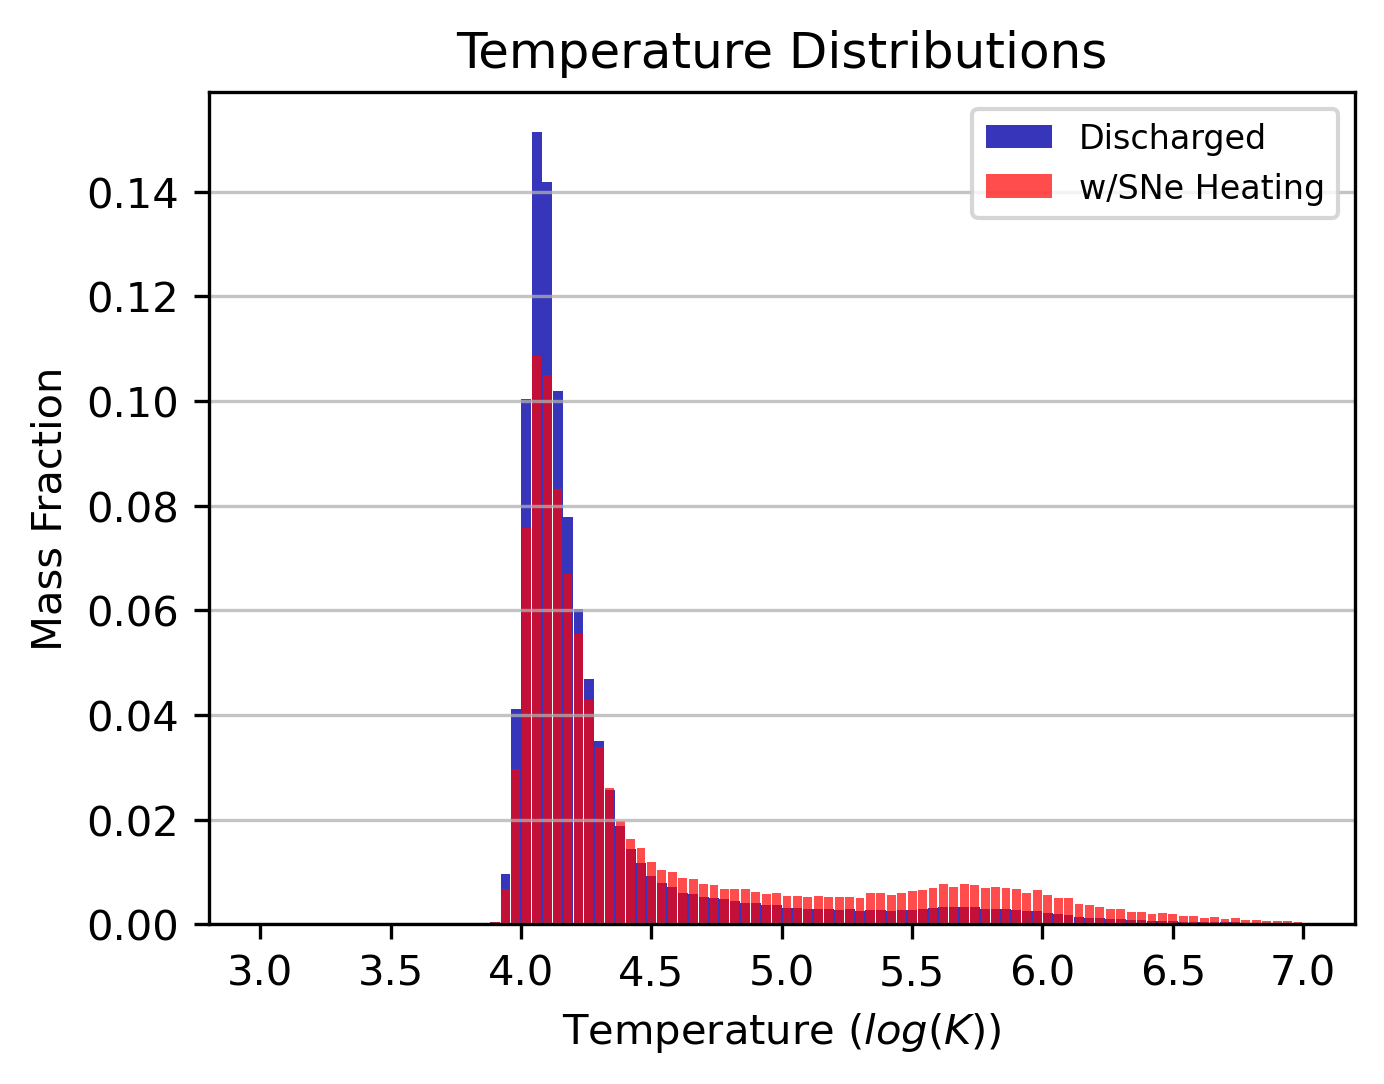

In [11]:
# calling logorithmic temperatures for pre-discharge, hot pre-discharge, discharged, and hot discharged gas.
pre_temp = np.log10(predischarged.temp)
hot_pre_temp = np.log10(preheated.temp)
all_temp = np.log10(discharged.temp)
cool_temp = np.log10(cooled.temp)
hot_temp = np.log10(heated.temp)


# exit angle histograms for all discharged and hot discharged gas.
bins = 100

plt.figure(dpi=300, figsize=(4.5,3.5), constrained_layout=True)
plt.hist(all_temp, bins=bins, weights=discharged.weight, color='#0504aa', alpha=0.8, rwidth=0.95,\
         label='Discharged', range=(3,7))
plt.hist(hot_temp, bins=bins, weights=heated.weight, color='red', alpha=0.7, rwidth=.85,\
         label='w/SNe Heating', range=(3,7))


plt.grid(axis='y', alpha=0.75)
plt.xlabel('Temperature ($log(K)$)')
plt.ylabel('Mass Fraction')
plt.title('Temperature Distributions')

plt.legend(frameon=True, fontsize='8')

# plt.xlim(7,13)
# plt.ylim(0,0.055)
plt.locator_params(axis="x", nbins=10)
plt.locator_params(axis="y", nbins=10)

plt.show()

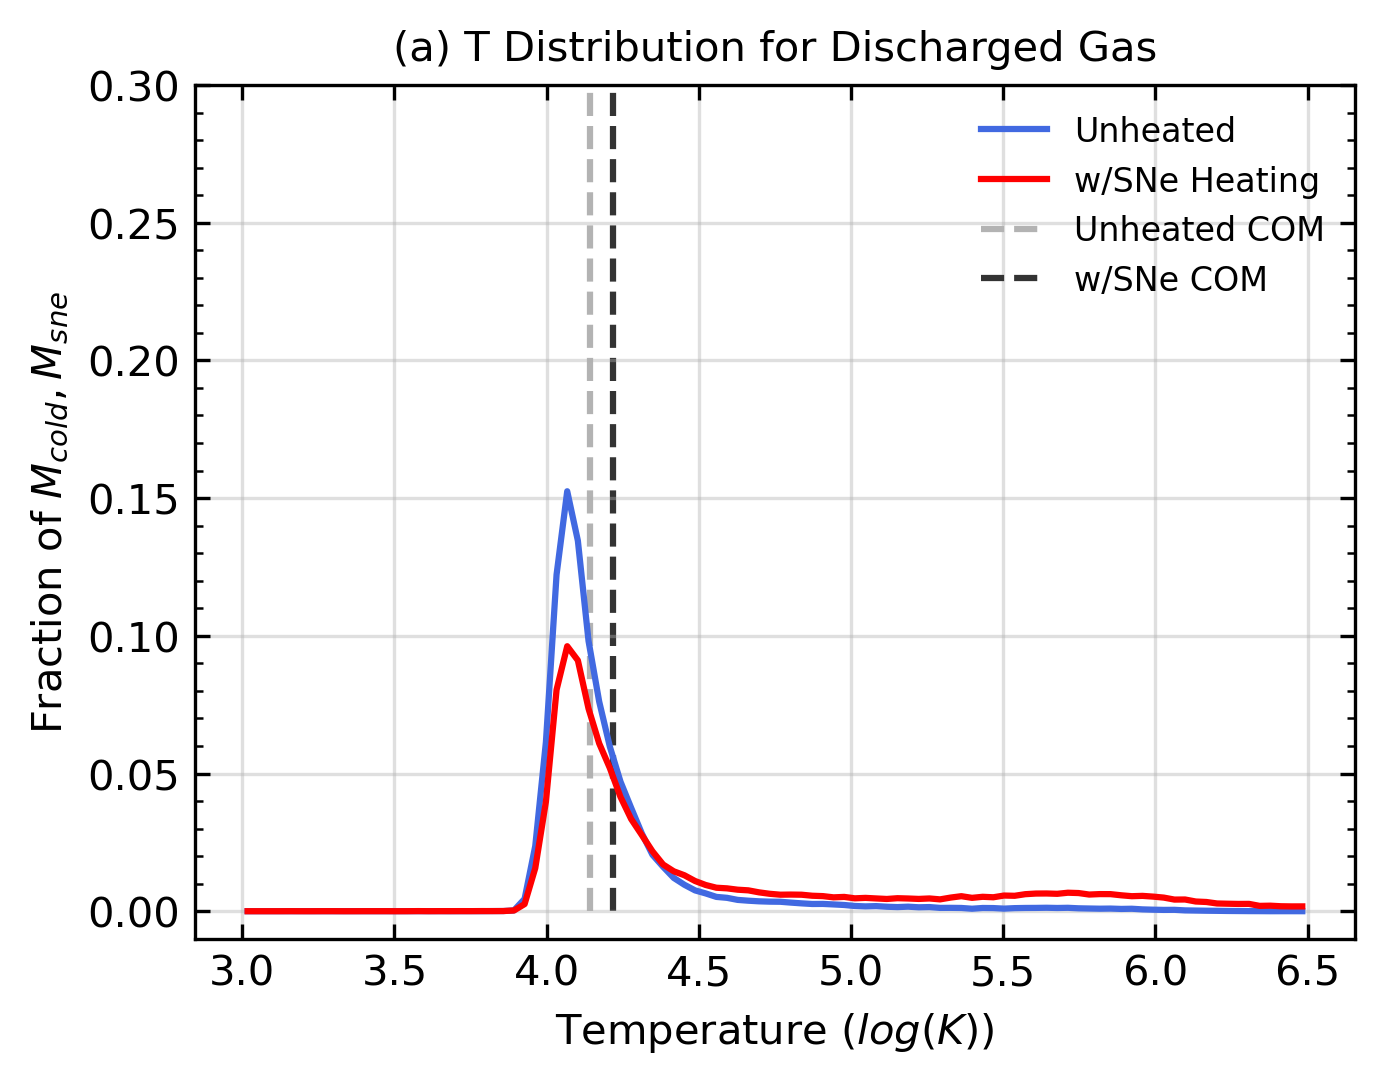

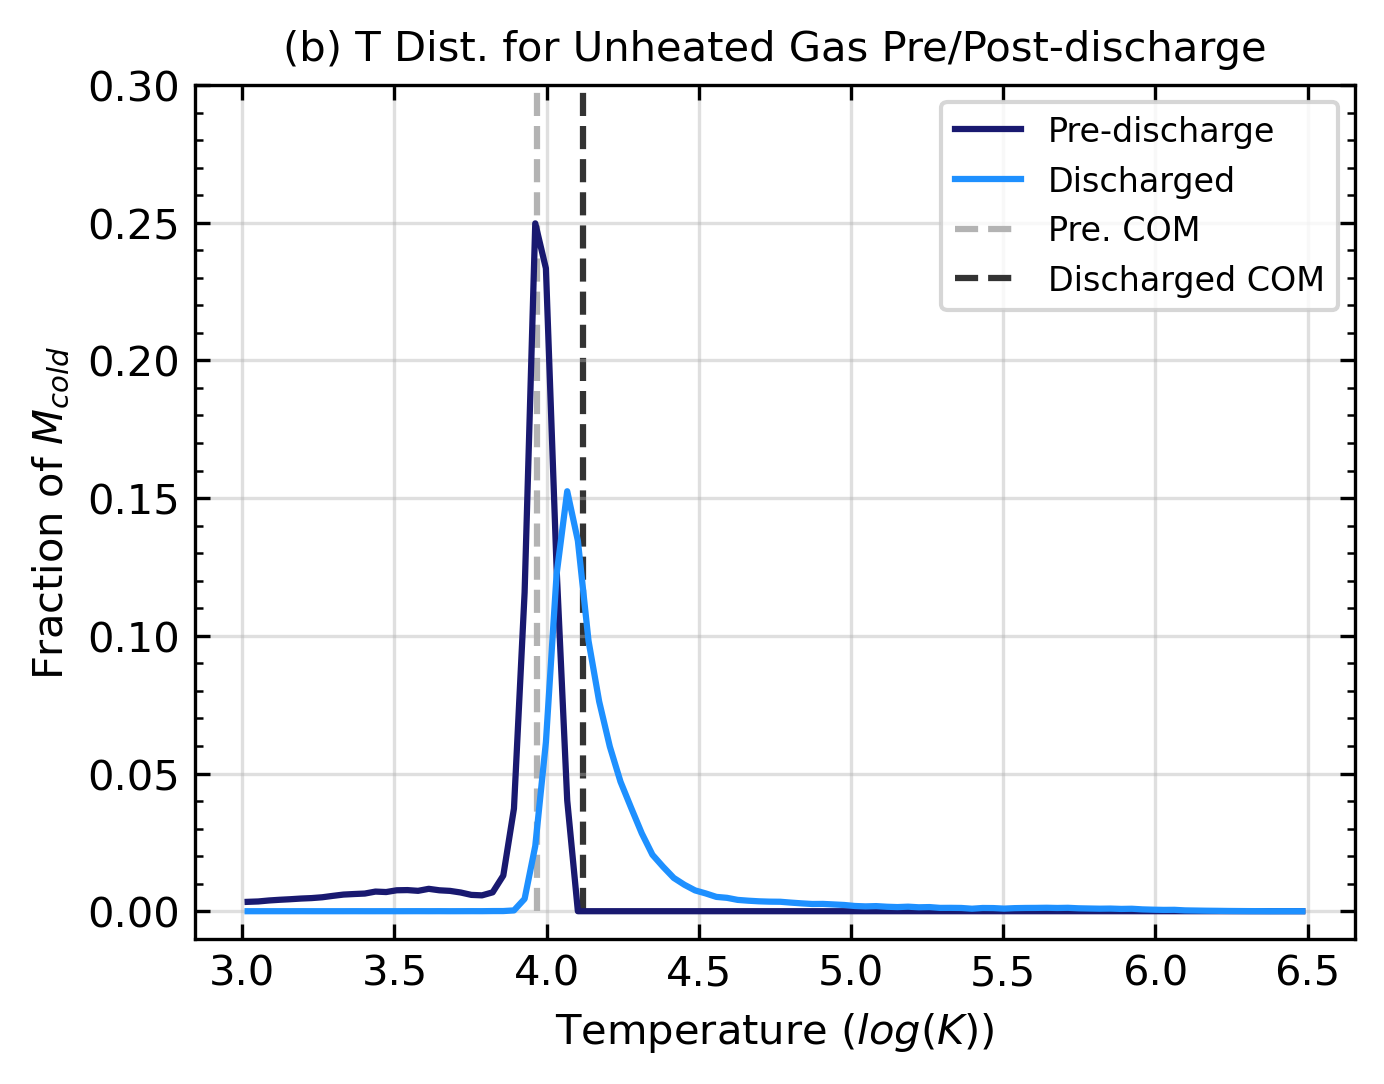

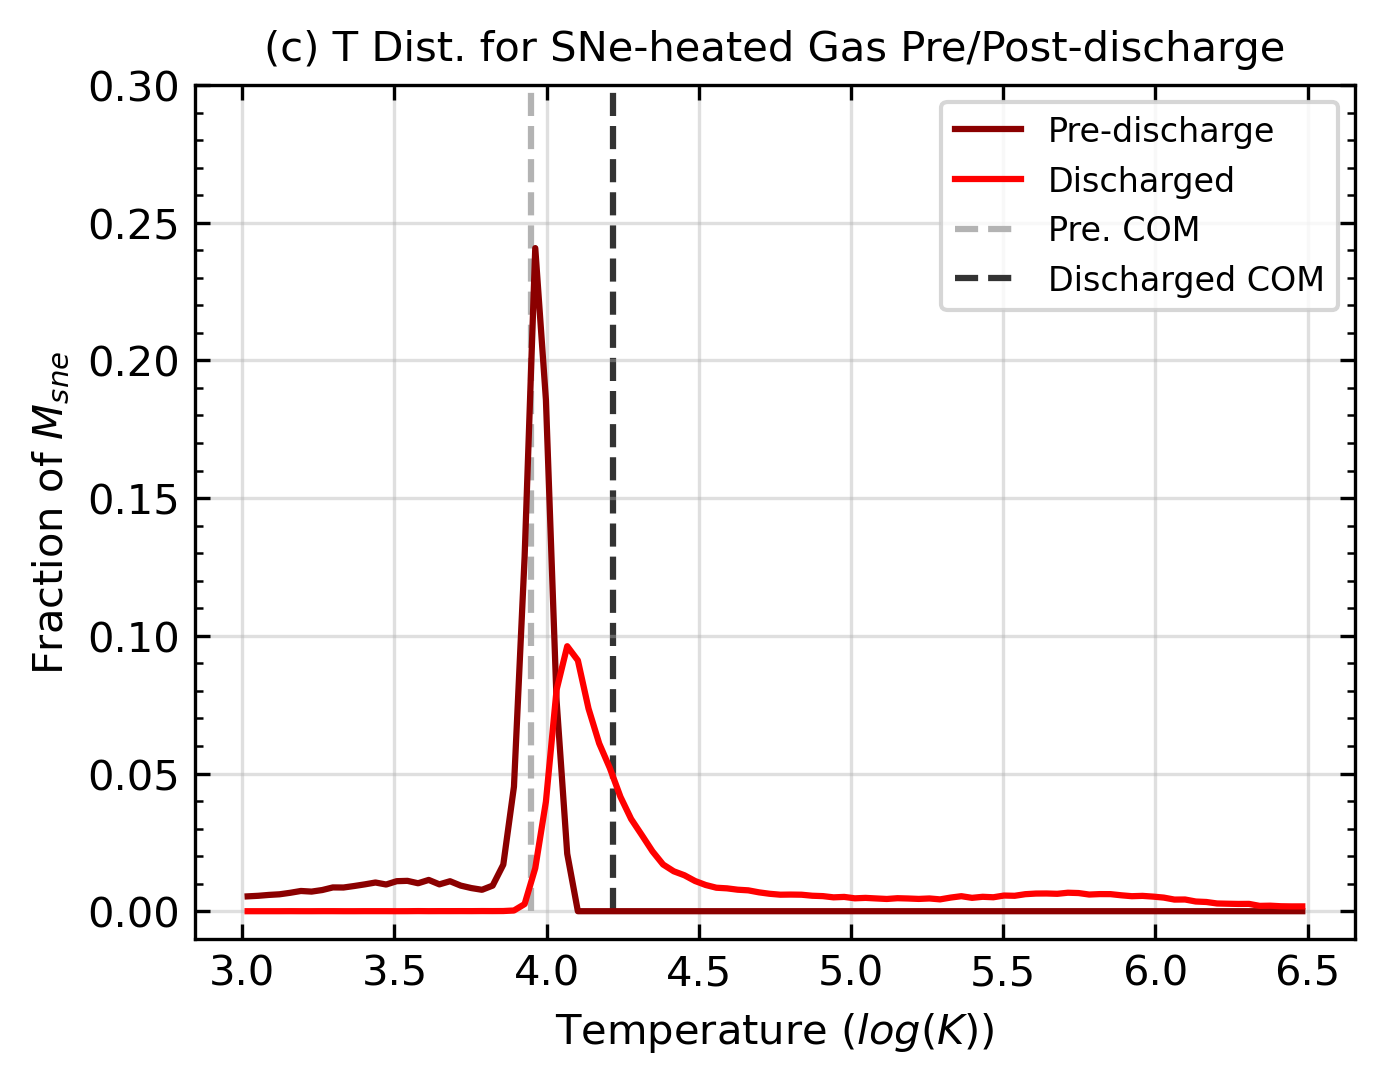

In [15]:
##### plotting discharged vs. heated gas #####
bins = 100
fig, ax = plt.subplots(1,1,dpi=300, figsize=(4.5,3.5), constrained_layout=True) # change to dpi=300 for printout.


# applying conditional on distances of gas from center of satellite; collecting frequency and bin information for plot.
y1, x = np.histogram(cool_temp, bins=bins, weights=cooled.weight, range=(3.0,6.5))
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='Unheated', c='royalblue')

y1, x = np.histogram(hot_temp, bins=bins, weights=heated.weight, range=(3.0,6.5))
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='w/SNe Heating', c='r')


# plot mean position of mass.
com1 = hot_temp.median()
com2 = all_temp.median()
ax.plot([com2,com2],[0,0.3],linestyle='--',color='0.7',zorder=-1, label='Unheated COM')
ax.plot([com1,com1],[0,0.3],linestyle='--',color='0.2',zorder=-1, label='w/SNe COM')


# labels, axis scaling, etc.
ax.legend(frameon=False, fontsize='8')

ax.set_title('(a) T Distribution for Discharged Gas', fontsize='medium')
ax.set_xlabel(r'Temperature ($log(K)$)')
ax.set_ylabel('Fraction of $M_{cold}, M_{sne}$')
# ax.set_xlim(3,8)
ax.set_ylim(-0.01,0.30)

ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(10))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))

ax.ticklabel_format(axis="y", style="plain",scilimits=(0,0))
ax.tick_params(direction='in',which='both',right=True,top=True)
ax.grid(alpha=0.4, zorder=-1000)

plt.savefig('plots/T_dist1.pdf')




##### plotting unheated discharged vs. pre-discharged gas #####
fig, ax = plt.subplots(1,1,dpi=300, figsize=(4.5,3.5), constrained_layout=True) # change to dpi=300 for printout.


# applying conditional on distances of gas from center of satellite; collecting frequency and bin information for plot.
y1, x = np.histogram(pre_temp, bins=bins, weights=predischarged.weight, range=(3,6.5))
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='Pre-discharge', c='midnightblue')

y1, x = np.histogram(cool_temp, bins=bins, weights=cooled.weight, range=(3,6.5))
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='Discharged', c='dodgerblue')


# plot mean position of mass.
com1 = pre_temp.median()
com2 = cool_temp.median()
ax.plot([com1,com1],[0,0.3],linestyle='--',color='0.7',zorder=-1, label='Pre. COM')
ax.plot([com2,com2],[0,0.3],linestyle='--',color='0.2',zorder=-1, label='Discharged COM')


# labels, axis scaling, etc.
ax.legend(frameon=True, fontsize='8')

ax.set_title('(b) T Dist. for Unheated Gas Pre/Post-discharge', fontsize='medium')
ax.set_xlabel(r'Temperature ($log(K)$)')
ax.set_ylabel('Fraction of $M_{cold}$')
# ax.set_xlim(2,7)
ax.set_ylim(-0.01,0.3)

ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(10))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))

ax.ticklabel_format(axis="y", style="plain",scilimits=(0,0))
ax.tick_params(direction='in',which='both',right=True,top=True)
ax.grid(alpha=0.4, zorder=-1000)

plt.savefig('plots/T_dist2.pdf')




##### plotting pre-discharge heated vs. heated gas #####
# bins = 100
fig, ax = plt.subplots(1,1,dpi=300, figsize=(4.5,3.5), constrained_layout=True) # change to dpi=300 for printout.


# applying conditional on distances of gas from center of satellite; collecting frequency and bin information for plot.
y1, x = np.histogram(hot_pre_temp, bins=bins, weights=preheated.weight, range=(3,6.5))
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='Pre-discharge', c='darkred')

y1, x = np.histogram(hot_temp, bins=bins, weights=heated.weight, range=(3,6.5))
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='Discharged', c='r')



# plot mean position of mass.
com1 = hot_temp.median()
com2 = hot_pre_temp.median()
ax.plot([com2,com2],[0,0.3],linestyle='--',color='0.7',zorder=-1, label='Pre. COM')
ax.plot([com1,com1],[0,0.3],linestyle='--',color='0.2',zorder=-1, label='Discharged COM')


# labels, axis scaling, etc.
ax.legend(frameon=True, fontsize='8')

ax.set_title('(c) T Dist. for SNe-heated Gas Pre/Post-discharge', fontsize='medium')
ax.set_xlabel(r'Temperature ($log(K)$)')
ax.set_ylabel('Fraction of $M_{sne}$')
# ax.set_xlim(2,8)
ax.set_ylim(-0.01,0.3)

ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(10))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))

ax.ticklabel_format(axis="y", style="plain",scilimits=(0,0))
ax.tick_params(direction='in',which='both',right=True,top=True)
ax.grid(alpha=0.4, zorder=-1000)

plt.savefig('plots/T_dist3.pdf')
plt.show()

### Code Testing <a class="anchor" id="proving"></a>

Testing out different data types and computations.

In [12]:
# picking out those gas particles that were subject to supernova heating.
cond = discharged.coolontime > discharged.time
hot_discharged = discharged[cond]

cond = predischarged.coolontime > predischarged.time
hot_predischarged = predischarged[cond]

hot_discharged[['coolontime', 'time']];

# displaying data for discharged gas.
# display(hot_ejected[['coolontime', 'time']], hot_expelled[['coolontime', 'time']])

print('Mass of expelled: ',np.sum(expelled['mass'])/1e7)
print('Mass of SNe heated expelled: ',np.sum(hot_expelled['mass'])/1e7)
print('Mass fraction of expelled heated by SN: ', np.sum(hot_expelled['mass'])/np.sum(expelled['mass']), '\n')

print('Mass of ejected: ',np.sum(ejected['mass'])/1e7)
print('Mass of SNe heated ejected: ',np.sum(hot_ejected['mass'])/1e7)
print('Mass fraction of ejected heated by SN: ', np.sum(hot_ejected['mass'])/np.sum(ejected['mass']), '\n')

print('Mass of discharged: ',np.sum(discharged['mass'])/1e7)
print('Mass of SNe heated discharged: ',np.sum(hot_discharged['mass'])/1e7)
print('Mass fraction of discharged heated by SN: ', np.sum(hot_discharged['mass'])/np.sum(discharged['mass']))

NameError: name 'expelled' is not defined

In [ ]:
# making plots comparing heated/discharged gas and predischarged/discharged gas radial positions.
bins = 100
fig, ax = plt.subplots(1,3, dpi=300, figsize=(8.5,2.2), sharey=True)


y1, bins = np.histogram(all_temp, bins=bins, weights=discharged.weight)
l1 = r'All Discharged'
ax[0].plot(bins[1:], y1, label=l1, color='b')

y2, bins = np.histogram(hot_temp, bins=bins, weights=heated.weight)
l2 = r'Heated'
ax[0].plot(bins[1:], y2, label=l2, color='r')



y1, bins = np.histogram(all_temp, bins=bins, weights=discharged.weight)
l1 = r'All Discharged'
ax[1].plot(bins[1:], y1, label=l1, color='b')

y2, bins = np.histogram(pre_temp, bins=bins, weights=predischarged.weight)
l2 = r'All Pre-discharge'
ax[1].plot(bins[1:], y2, label=l2, color='cadetblue')



y1, bins = np.histogram(hot_pre_temp, bins=bins, weights=hot_predischarged.weight)
l1 = r'Heated Pre-discharge'
ax[2].plot(bins[1:], y1, label=l1, color='darkcyan')

y2, bins = np.histogram(hot_temp, bins=bins, weights=heated.weight)
l2 = r'Heated'
ax[2].plot(bins[1:], y2, label=l2, color='r')


# titles, legends, and ticks.
ax[0].set_title(r'Discharged vs. Heated')
ax[1].set_title(r'Discharged vs. Pre-discharge')
ax[2].set_title(r'Pre-discharge vs. Heated')

ax[0].legend(fontsize='small')
ax[1].legend(fontsize='small')
ax[2].legend(fontsize='small')


ax[1].set_xlabel(r'Radial Velocity Relative to Sat. Center $(km/h)$')
ax[0].set_ylabel('Fraction Discharged Mass')


for a in ax:
    a.set_xlim(2,7)
    #a.set_ylim(0,1)
    
    a.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))
    a.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.02))

    
    
# plt.savefig('plots/comparison_radvel.pdf')
plt.show()